# AMAZON REVIEWS-NLP

In [1]:
import pandas as pd

In [2]:
amazon = pd.read_table(r"D:\data set\amazonreviews.tsv")

In [3]:
amazon.shape

(10000, 2)

In [4]:
import nltk

In [5]:
from nltk.corpus import stopwords

In [6]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
#stopwords.words('english')

In [8]:
import string
#string.punctuation

In [9]:
def text_process(mess):            ### creating a function
    """                                                        ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char  not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in stopwords.words("english")]


In [10]:
amazon.review=amazon.review.str.lower()
#amazon.review

In [11]:
#amazon['review'].apply(text_process)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
#it is used to get the count of each and every word

In [13]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(amazon['review'])

In [14]:
#bow_transformer.vocabulary_

In [15]:
#len(bow_transformer.vocabulary_)

In [16]:
review_bow = bow_transformer.transform(amazon.review)
review_bow.shape
# over there TDM is created

(10000, 40040)

In [17]:
type(review_bow)

scipy.sparse.csr.csr_matrix

In [18]:
from sklearn.model_selection import train_test_split
df_x_train,df_x_test,df_y_train,df_y_test = train_test_split(review_bow,amazon.label ,test_size=.2)

In [19]:
print(df_x_train.shape)
print(df_y_train.shape)
print(">......<")
print(df_x_test.shape)
print(df_y_test.shape)

(8000, 40040)
(8000,)
>......<
(2000, 40040)
(2000,)


In [20]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(df_x_train,df_y_train)

MultinomialNB()

In [21]:
pred=nb.predict(df_x_test)

In [22]:
from sklearn.metrics import confusion_matrix
tab=confusion_matrix(df_y_test,pred)
tab

array([[911, 142],
       [181, 766]], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(df_y_test,pred)

0.8385

In [24]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

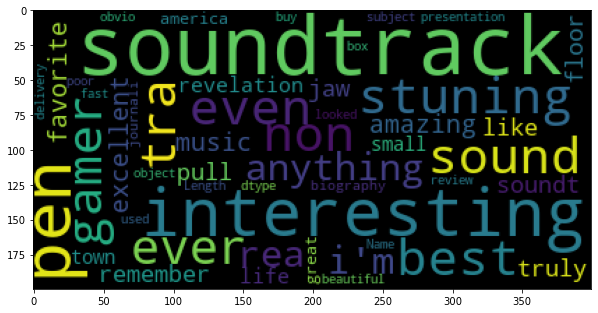

In [25]:
cloud  = WordCloud(stopwords = stopwords.words("english"), max_words= 50).generate(str(amazon['review']) )
plt.figure(figsize=(10 , 10)) 
plt.imshow(cloud)